In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from model import DoubleMassSpringDamper
from imp import reload
#reload(DoubleMassSpringDamper)
%load_ext autoreload

%autoreload 2

C:\Users\karan\AppData\Local\Temp\ipykernel_26220\3200986108.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [2]:
def isControlable(A, B):
    n = len(A)
    conMat = []
    for i in range(n):
        conMat.append(np.dot(np.linalg.matrix_power(A, i), B))
    return np.linalg.matrix_rank(conMat) == n

def isObservable(A, C):
    n = len(A)
    obsMat = []
    for i in range(n):
        obsMat.append(np.dot(C, np.linalg.matrix_power(A, i)))
    return np.linalg.matrix_rank(obsMat) == n




[False False False False]
True
<class 'numpy.ndarray'>
[[-1.7905125 -0.6094775 -0.02       0.01025  ]]
[0.0, 0.0, 1.0, 0.0]


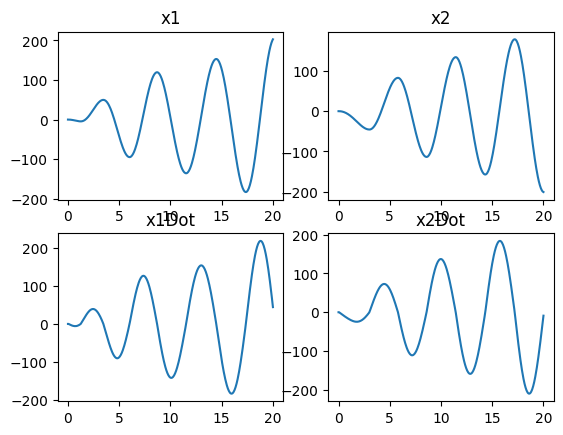

In [6]:
def main():
    m1 = 1
    m2 = 2
    c1 = 0.05
    c2 = 0.08
    k  = 1.2
    b = 0.1
    isDisturbance = True
    simTime = 50
    simDt = 0.05
    r = 2 #reference to be tracked
    doubleMSD = DoubleMassSpringDamper(m1, m2, b, c1, c2, k, isDisturbance)

    print(isControlable(doubleMSD.AMat, doubleMSD.BMat))
    print(isObservable(doubleMSD.AMat, doubleMSD.CMat))

    poles = np.array([-0.1, -0.05, -0.03, -0.04])
    print(type(doubleMSD.AMat))
    K_mat = sc.signal.place_poles(np.array(doubleMSD.AMat), np.array(doubleMSD.BMat).reshape(4,1), np.array(poles)).gain_matrix

    y0 = [0, 0, 0, 0]
    y = y0
    print(K_mat)
    y_array = [y]
    time_array = [0]
    dyn = doubleMSD.DynSS(y, 0, 1)
    print(dyn)
    for time in np.arange(0, simTime, simDt):
        u_ss = -doubleMSD.k*(1 + doubleMSD.c1/doubleMSD.c2)*r
        u_sf = np.dot(K_mat, y)
        u_tot = u_ss + u_sf
        #print('u_tot', u_tot)
        y_next = doubleMSD.nextState(np.array(y), u_tot[0], simDt)
        y_array.append(y_next)
        y = y_next
        time_array.append(time+simDt)

    y_array = np.array(y_array)
    plt.figure(1)
    ax1 = plt.subplot(2,2,1)
    ax1.plot(time_array, y_array[:,0])
    ax1.title.set_text('x1')
    ax2 = plt.subplot(2,2,2)
    ax2.plot(time_array, y_array[:,1])
    ax2.title.set_text('x2')
    ax3 = plt.subplot(2,2,3)
    ax3.plot(time_array[:], y_array[:,2])
    ax3.title.set_text('x1Dot')
    ax4 = plt.subplot(2,2,4)
    ax4.plot(time_array[:], y_array[:,3])
    ax4.title.set_text('x2Dot')

    




if __name__ == '__main__':
    main()


In [4]:
from model import DoubleMassSpringDamper
doubleMSD1 = DoubleMassSpringDamper(1, 1,3, 3, 2, 1, True)
print(doubleMSD1.AMat)

[[ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [-1. -1. -6.  3.]
 [ 1. -1.  3. -5.]]
